In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Chapter 3 - Quantum Labs notebook

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)


In [3]:
qc.measure(range(2), range(2))

In [4]:
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [5]:
backend = Aer.get_backend('qasm_simulator')

In [6]:
job_simulator = execute(qc, backend, shots=1024)

In [7]:
result_simulator = job_simulator.result()

In [8]:
counts = result_simulator.get_counts(qc)
print(counts)


{'11': 543, '00': 481}


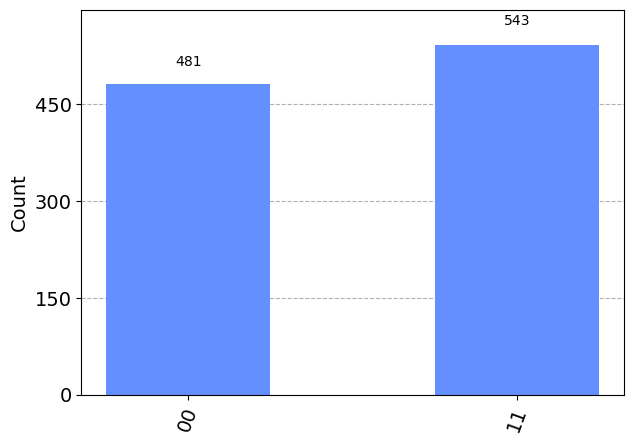

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


# Executing a circuit on a quantum computer

In [10]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [11]:
backend = provider.get_backend('ibmq_qasm_simulator')

{'11': 532, '00': 492}


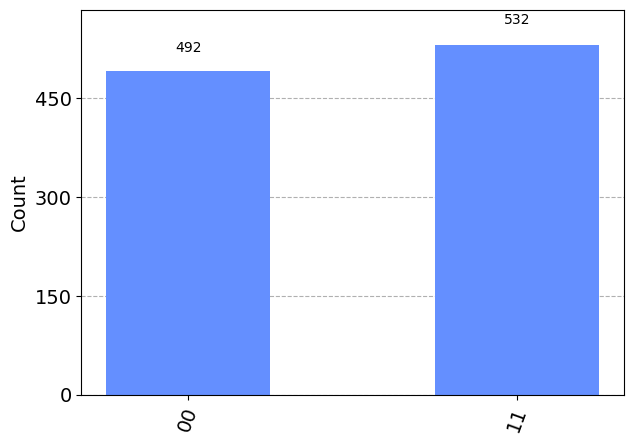

In [12]:
# Repeating steps 2-5 from above:
job_simulator = execute(qc, backend, shots=1024)
result_simulator = job_simulator.result()
counts = result_simulator.get_counts(qc)
print(counts)
plot_histogram(counts)